In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data cleaning

In [5]:
df.shape

(103, 7)

In [11]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [13]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [35]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [37]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000,260721,4950000.0,70393.5
2,2,China,Asia,123059739,88287,1675215.0,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820.0,57879.0


In [39]:
df.isna().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [51]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [41]:
df2=df.dropna().reset_index()

In [43]:
df2.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205.0,75167.5
1,1,1,India,Asia,348448000,260721,4950000.0,70393.5
2,2,2,China,Asia,123059739,88287,1675215.0,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575.0,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820.0,57879.0


In [45]:
df2.drop(["index","Unnamed: 0"], axis = 1 ,inplace=True)

In [47]:
df2.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205.0,75167.5
1,India,Asia,348448000,260721,4950000.0,70393.5
2,China,Asia,123059739,88287,1675215.0,73459.1
3,Thailand,Asia,87468496,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704,324219,1130820.0,57879.0


In [49]:
df2.dtypes

Country                     object
Continent                   object
Production(Tons)            object
ProductionperPerson(Kg)     object
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

In [90]:
df2["Production(Tons)"]= df2["Production(Tons)"].astype(float)
df2["ProductionperPerson(Kg)"]= df2["ProductionperPerson(Kg)"].astype(float)
df["Acreage(Hectare)"]= df2["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]= df2["Yield(Kg/Hectare)"].astype(float)

In [98]:
df2.drop(["ProductionperPerson (Kg)"],axis=1,inplace=True)

In [100]:
df2.dtypes

Country                     object
Continent                   object
Production(Tons)           float64
ProductionperPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

In [102]:
df2.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionperPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

## univariate analysis

In [104]:
df2.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## how many countries produce sugarcane from each continent

In [80]:
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

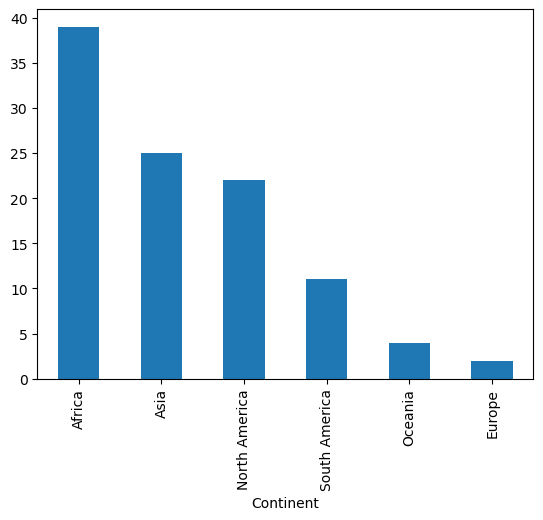

In [82]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\171244598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Production(Tons)"])
C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\171244598.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["ProductionperPerson(Kg)"])
C:\

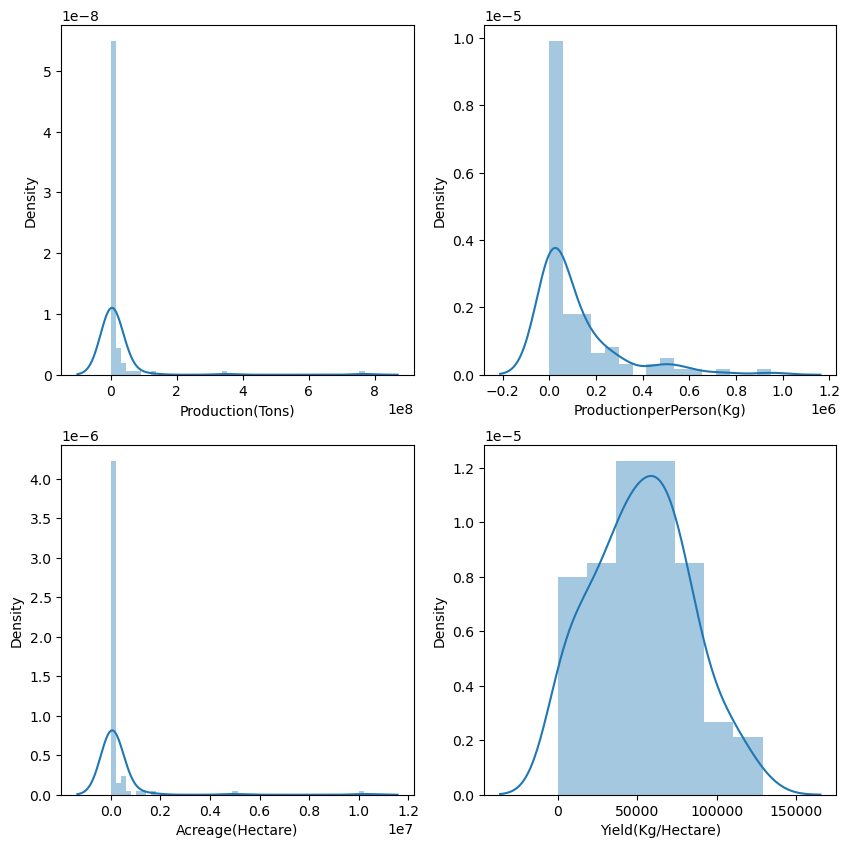

In [120]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df2["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df2["ProductionperPerson(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df2["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df2["Yield(Kg/Hectare)"])
plt.show()

## checking outliers

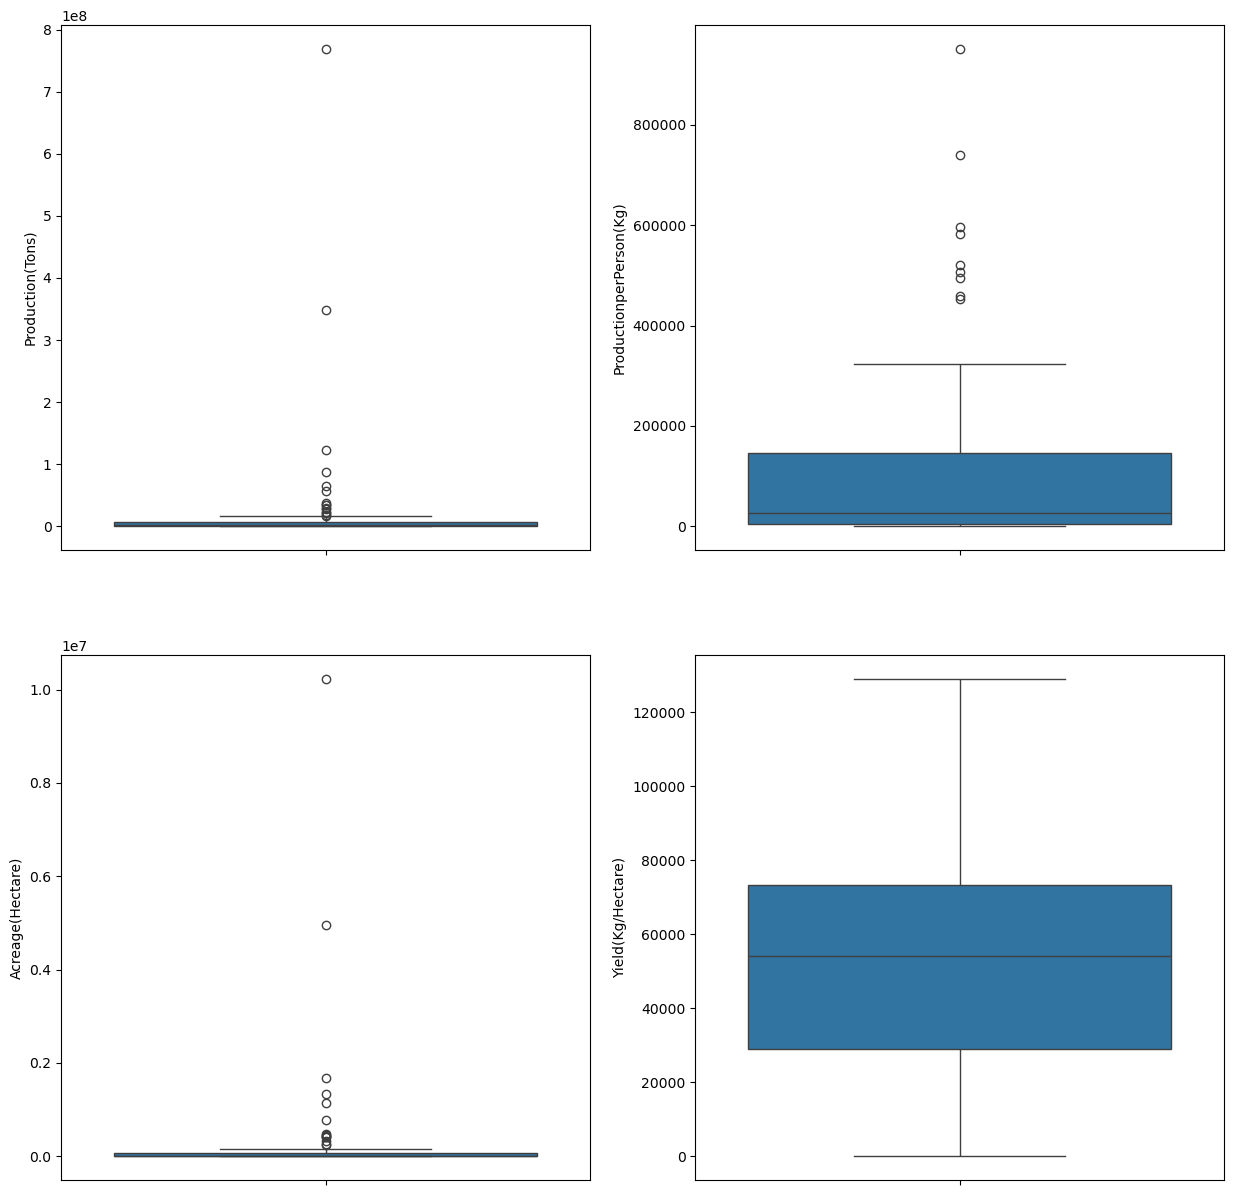

In [122]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(df2["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df2["ProductionperPerson(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df2["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df2["Yield(Kg/Hectare)"])
plt.show()

In [124]:
df2.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.935755,2.498981e+05,52628.078431
std,8.419149e+07,176651.019131,1.137003e+06,30504.676683
min,1.000000e+01,6.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate analysis

In [129]:
df2.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## which country produces maximum sugarcane

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\3896141443.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


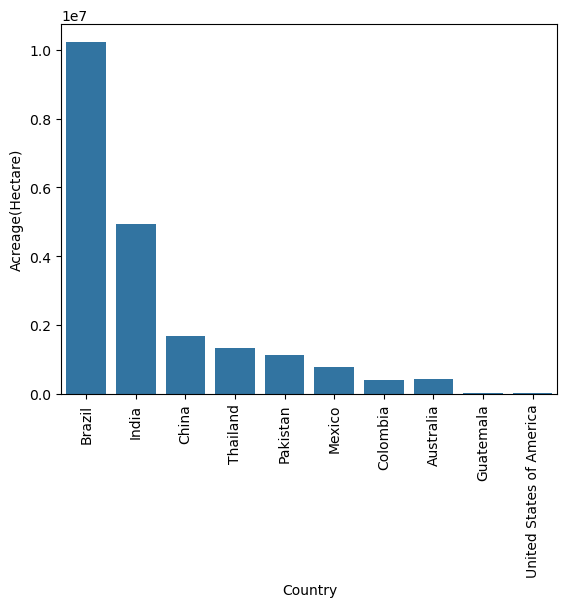

In [165]:

ax=sns.barplot(x="Country",y="Acreage(Hectare)",data=df2.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which country has highest land

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\2045385803.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(dx.get_xticklabels(),rotation=90)


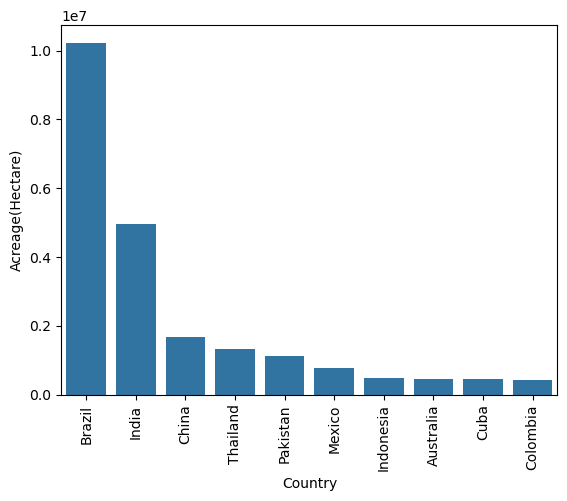

In [167]:
df_h=df2.sort_values("Acreage(Hectare)",ascending=False)
dx=sns.barplot(x="Country",y="Acreage(Hectare)",data=df_h.head(10))
dx.set_xticklabels(dx.get_xticklabels(),rotation=90)
plt.show()


## which country has highest yield per hectare?

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\3591479176.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dy.set_xticklabels(dy.get_xticklabels(),rotation=90)


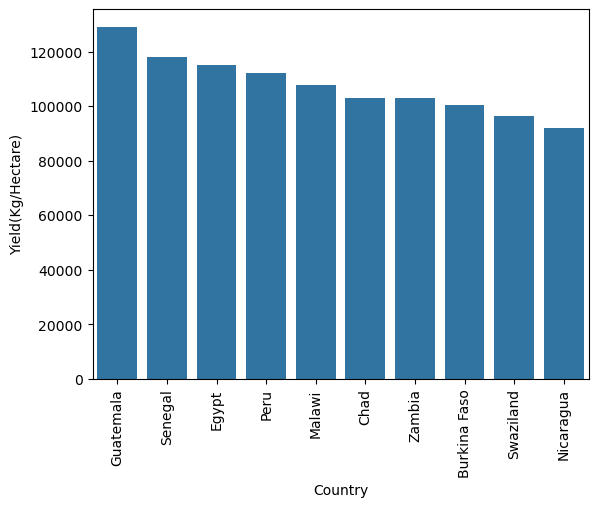

In [169]:
df_y=df2.sort_values("Yield(Kg/Hectare)",ascending=False)
dy=sns.barplot(x="Country",y="Yield(Kg/Hectare)",data=df_y.head(10))
dy.set_xticklabels(dy.get_xticklabels(),rotation=90)
plt.show()

## which country has highest production

C:\Users\SAKSHI MOTE\AppData\Local\Temp\ipykernel_32016\2806160045.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dp.set_xticklabels(dp.get_xticklabels(),rotation=90)


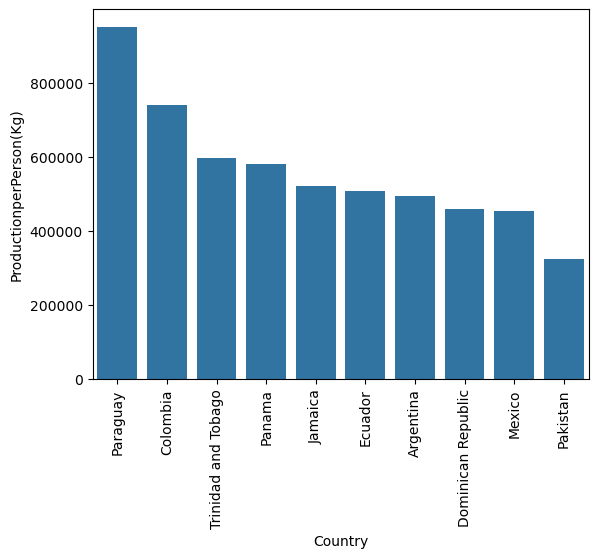

In [172]:
df_p=df2.sort_values("ProductionperPerson(Kg)",ascending=False)
dp=sns.barplot(x="Country",y="ProductionperPerson(Kg)",data=df_p.head(10))
dp.set_xticklabels(dp.get_xticklabels(),rotation=90)
plt.show()

## correlation

## do countries with highest land produce more sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

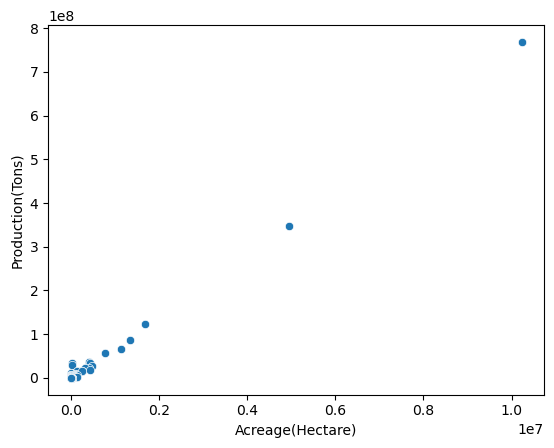

In [178]:
sns.scatterplot(data=df2,x="Acreage(Hectare)",y="Production(Tons)")

## do countries which yeild more sugarcane per hectare produces more sugarcane in total

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

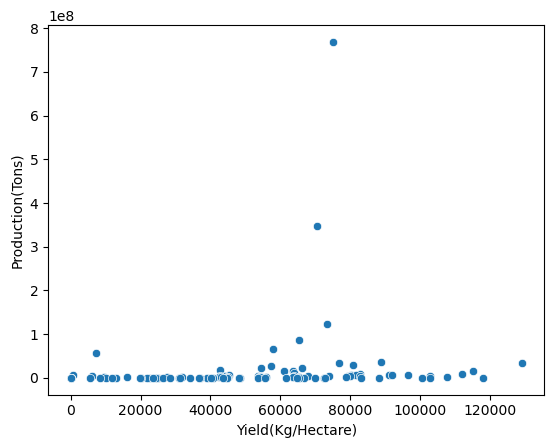

In [181]:
sns.scatterplot(data=df2,x="Yield(Kg/Hectare)",y="Production(Tons)")

## Analysis for continent

In [208]:
df2["Continent"].value_counts()

Continent
Africa           39
Asia             24
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

## which continent produces the maximum sugarcane

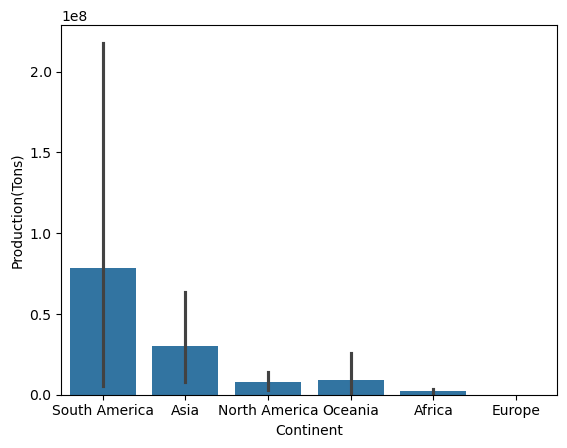

In [219]:
df_c=df2.sort_values("Production(Tons)",ascending=False)
dc=sns.barplot(y="Production(Tons)",x="Continent",data=df_c)

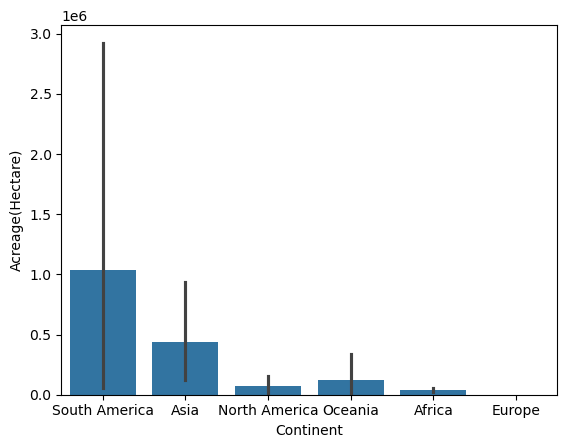

In [221]:
df_a=df2.sort_values("Acreage(Hectare)",ascending=False)
da=sns.barplot(y="Acreage(Hectare)",x="Continent",data=df_a)